In [4]:
import numpy as np
import matplotlib.pyplot as plt

---

you should really use this class and look it up in the documentation


https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html



In [5]:
P = np.poly1d([1,1])
print(P)

 
1 x + 1


---

# Lagrange polynomials

In [160]:

def L_i(X):
    '''calculate the Lagrange polys'''
    L = []
    for i, x_i in enumerate(X):
        P = np.poly1d([1])
        for j, x_j in enumerate(X):
            if i == j : continue
            P *= np.poly1d([1, - x_j ])/( x_i - x_j)
        L.append(P)
        
    return L

# Fit to function

In [161]:
X = np.arange(5)
L = L_i(X)

# you can change the function here
f = np.cos
#calculate the approximation
fit = sum([ y*p for y, p  in zip(f(X),L)])
# you really do need this as fit is only a np.array
fit = np.poly1d(fit)

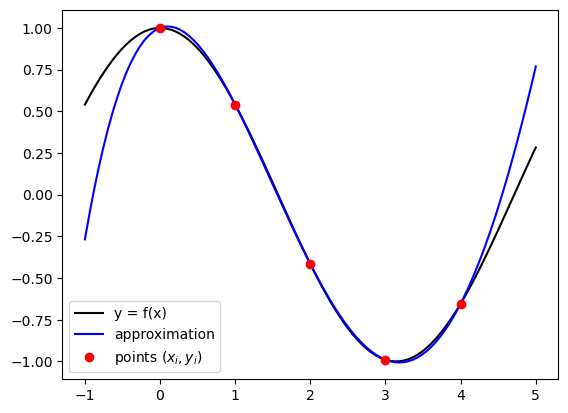

In [172]:
T = np.linspace(-1,5,100)
plt.plot(T, f(T),'k', label = "y = f(x)" )
plt.plot(T, fit(T),'b', label = "approximation");
plt.plot(X, f(X),'ro', label = "points $(x_i,y_i)$");

plt.legend(loc='lower left');

---

# Newton’s Polynomial Interpolation


I tried doing this by myself but 
then I got tired and I got the code from 
[here](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.05-Newtons-Polynomial-Interpolation.html)

In [91]:
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros((n, n))
    
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i,j] = (coef[i+1,j-1] - coef[i,j-1]) / (x[i+j] - x[i])
            
    return coef


def eval_poly(diff_table, 
                X, 
                x):
    '''
    evaluate the newton polynomial at x
    '''
 
    coeffs = diff_table[0]
    
    #it's like horner
    P = 0 
    # I corrected this
    for k  in range(-1, -len(X)-1, -1):
        P =  (x - X[k])*P + coeffs[k]
        
    return P

# then I made this to check

def diffs2poly(diff_table, 
                X):
    '''
    calculate the interpolating polynomial
    '''
    
    coeffs = diff_table[0]   
    P = 0
    # going backwards so -1
    for k  in range(-1, -len(X)-1, -1):
        P =  np.poly1d([1, - X[k]])*P + coeffs[k]
    return np.poly1d(P)

---

# Example exo 1

In [92]:
# I think I coped and pasted from the pdf

X, Y = list(zip(* [(1, 3), (2, 2), (4, 1), (5, 4)]))

divided_diff(X,Y)

array([[ 3.        , -1.        ,  0.16666667,  0.25      ],
       [ 2.        , -0.5       ,  1.16666667,  0.        ],
       [ 1.        ,  3.        ,  0.        ,  0.        ],
       [ 4.        ,  0.        ,  0.        ,  0.        ]])

In [93]:
diffs = divided_diff(X, Y)
newton = diffs2poly(diffs, X)
print(newton)

      3         2
0.25 x - 1.583 x + 2 x + 2.333


you get the same polynomial as with Lagrange
it's unique !!!!

In [94]:
L = L_i(X)

fit = sum([ y*p for y, p  in zip(Y,L)])
# you really do need this as fit is only a np.array
fit = np.poly1d(fit)
print(fit)

      3         2
0.25 x - 1.583 x + 2 x + 2.333


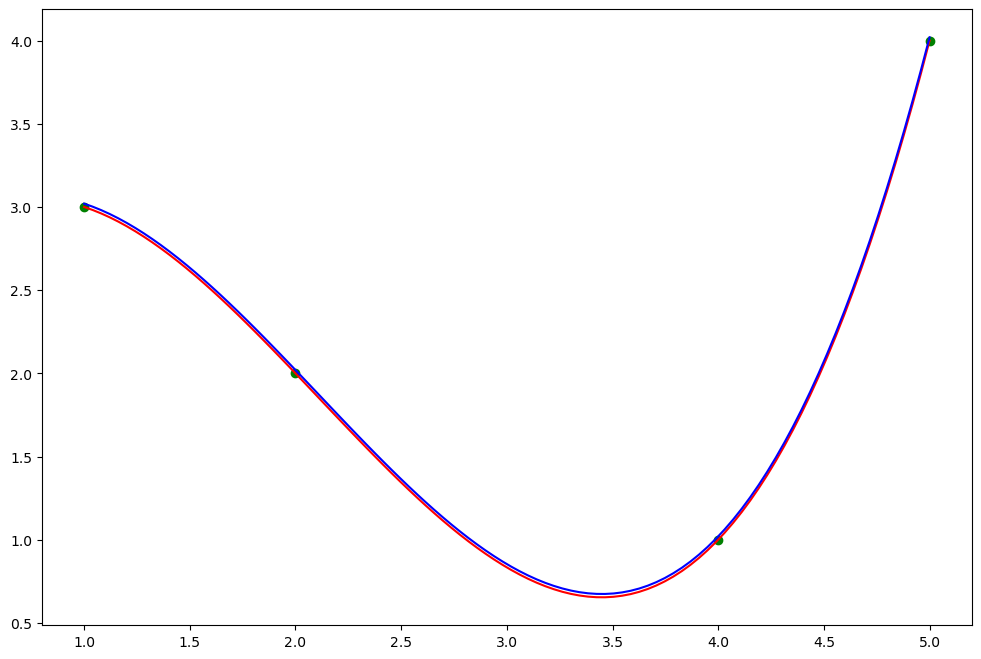

In [95]:
plt.figure(figsize = (12, 8))
plt.plot(X, Y, 'go')

# evaluate on new data points
xs =  np.linspace(1,5,100)
plt.plot(xs, newton(xs),'r');
plt.plot(xs, fit(xs)+.02,'b');

---

# Runge

[compare with this](https://en.wikipedia.org/wiki/Runge%27s_phenomenon)

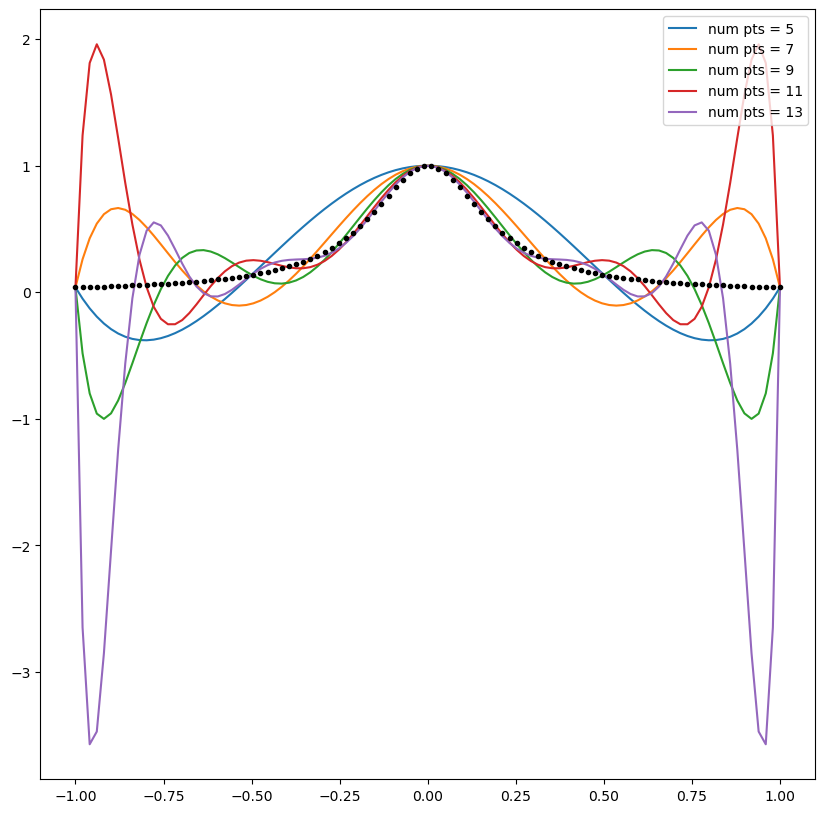

In [96]:
fig, ax  = plt.subplots(1, figsize=(10, 10))

#ax.set_aspect('equal')

x_ref = np.linspace(-1,1,100)

for N in range(5,15,2):
    
    X = np.linspace(-1,1,N)
    Y = 1/(1 + 25*X**2)
    
    P = diffs2poly(divided_diff(X, Y),X) 
    # display the graph 
    ax.plot(x_ref, P(x_ref), label=f'num pts = {N}')
    
ax.legend(loc='upper right')
    
X = x_ref
Y = 1/(1 + 25*X**2)
ax.plot(X, Y,'k.');

---

# Chebyshev polynomials


The Chebyshev polynomials of the first kind are obtained from the recurrence relation

$ \begin{aligned}T_{0}(x)&=1\\T_{1}(x)&=x\\T_{n+1}(x)&=2x\,T_{n}(x)-T_{n-1}(x).\end{aligned}$

In [135]:
TCH = [np.poly1d([1]), np.poly1d([1,0]) ]

for k in range(6):
    TCH.append( np.poly1d([2,0])* TCH[-1] - TCH[-2])

In [137]:
for P in TCH[:]:
    print(P)

 
1
 
1 x
   2
2 x - 1
   3
4 x - 3 x
   4     2
8 x - 8 x + 1
    5      3
16 x - 20 x + 5 x
    6      4      2
32 x - 48 x + 18 x - 1
    7       5      3
64 x - 112 x + 56 x - 7 x


### Check here:


https://en.wikipedia.org/wiki/Chebyshev_polynomials#First_kind

---

# Chebyshev nodes


https://math.stackexchange.com/questions/803915/how-to-find-chebyshev-nodes

For a given positive integer n the Chebyshev nodes in the interval (−1, 1) are

$x_{k}=\cos \left({\frac {2k-1}{2n}}\pi \right),\quad k=1,\ldots ,n.$

- These are the roots of the Chebyshev polynomial of the first kind of degree n. 
- For nodes over an arbitrary interval [a, b] an affine transformation can be used:

$ x_{k}={\frac {1}{2}}(a+b)+{\frac {1}{2}}(b-a)\cos \left({\frac {2k-1}{2n}}\pi \right),\quad k=1,\ldots ,n.$

In [139]:
n = 5
T = np.pi * np.linspace(.5/n, 1 - .5/n, n)
TCH[5](np.cos(T))

array([-8.44707874e-16,  5.22058177e-16,  3.06161700e-16, -5.22058177e-16,
        8.44707874e-16])

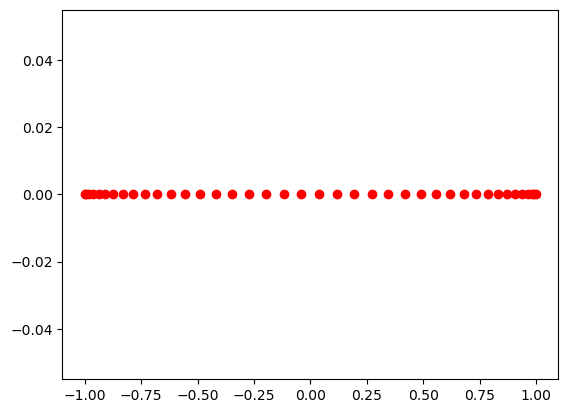

In [141]:
n = 40
T = np.pi * np.linspace(.5/n, 1 - .5/n, n)

plt.plot(np.cos(T), 0*T, 'ro');

In [108]:
def chebyshev_nodes(a, b, n):
    '''n Chebyshev nodes for [a,b]'''
    T = np.arange(1,n+1)
    X = np.cos((T - 0.5)/n * np.pi) # nodes over interval [-1,1]
    return 0.5*(b-a)*X + 0.5*(b+a) # nodes over interval [a,b]

In [155]:
X = chebyshev_nodes(-1,1,5)
TCH[5](X)

array([-8.44707874e-16,  0.00000000e+00,  3.06161700e-16, -5.22058177e-16,
        8.44707874e-16])

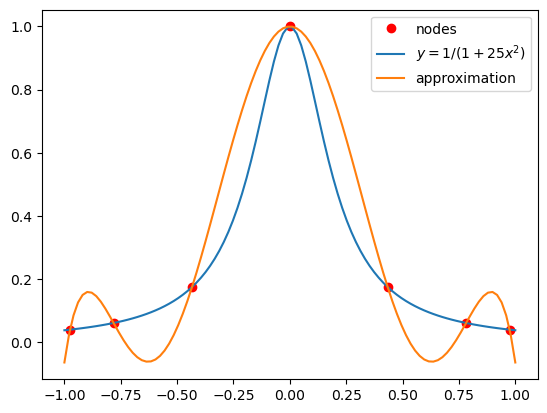

In [154]:

X = chebyshev_nodes(-1,1,7)
Y = 1/(1 + 25*X**2)

newton = diffs2poly(divided_diff(X, Y),X)

x_ref = np.linspace(-1,1,100)
plt.plot(X, Y,'ro',label= 'nodes');
plt.plot(x_ref, 1/(1 + 25*x_ref**2), label= "$y = 1/(1+25x^2)$")
plt.plot(x_ref, newton(x_ref), label = 'approximation');


plt.legend(loc='upper right')

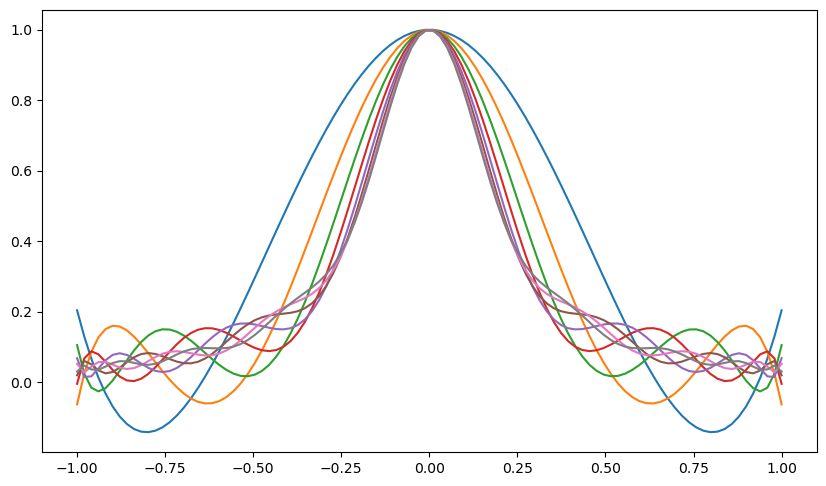

In [159]:
fig, ax  = plt.subplots(1, figsize=(10, 10))
ax.set_aspect('equal')

x_ref = np.linspace(-1,1,100)

for N in range(5,20,2):
    X = chebyshev_nodes(-1,1,N)
    Y = 1/(1 + 25*X**2)
    newton = diffs2poly(divided_diff(X, Y),X)
    
    #show the whole thing
    #plt.plot(X, Y, "ro")
    plt.plot(x_ref, newton(x_ref));

---

# Linear regression

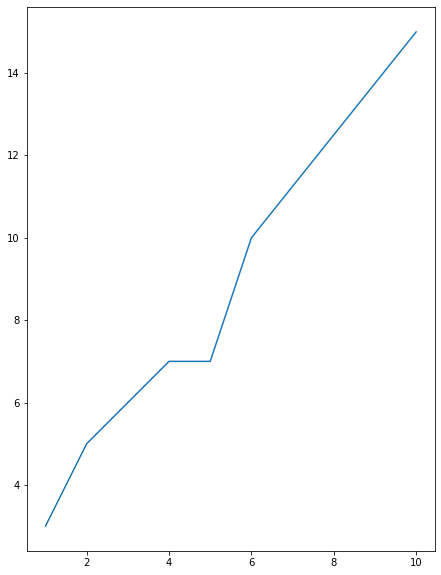

In [21]:
pts = [(1, 3), (2, 5), (3, 6), (4, 7), (5, 7), (6, 10), (10, 15)]

X, Y = list(zip(*pts))
X = np.array(X)

fig, ax  = plt.subplots(1, figsize=(10, 10))
ax.set_aspect('equal')
ax.plot(X,Y);

In [11]:
np.polyfit(X,Y,1)

array([1.28989362, 1.85904255])

? np.polyfit

Signature:  np.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
Docstring:
Least squares polynomial fit.

.. note::
   This forms part of the old polynomial API. Since version 1.4, the
   new polynomial API defined in `numpy.polynomial` is preferred.
   A summary of the differences can be found in the
   :doc:`transition guide </reference/routines.polynomials>`.
   
   Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
to points `(x, y)`. Returns a vector of coefficients `p` that minimises
the squared error in the order `deg`, `deg-1`, ... `0`.

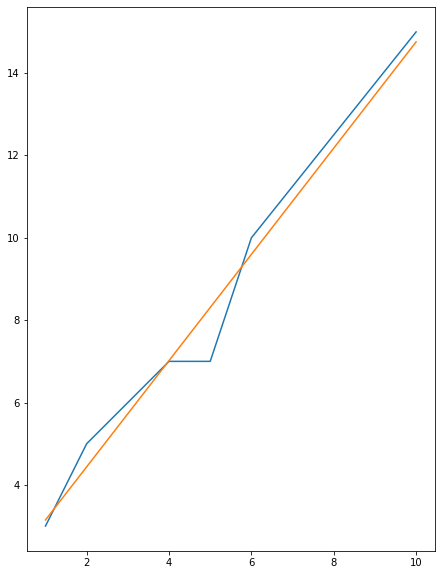

In [26]:
a, b = np.polyfit(X,Y,1)

fig, ax  = plt.subplots(1, figsize=(10, 10))
ax.set_aspect('equal')

ax.plot(X,Y)
ax.plot(X, a*X + b);

In [20]:
X

(1, 2, 3, 4, 5, 6, 10)

---

## exo 7 


Calculer le polynôme caractéristique d’une matrice de taille n en utilisant
l’interpolation du déterminant.

In [2]:
import numpy as np

In [33]:
n = 2
A = np.ones((2,2))
A[0,0] = 2
A[1,1] = 0
A

array([[2., 1.],
       [1., 0.]])

In [55]:
def char_poly(A):
    n = A.shape[0]
    T  = np.linspace(0,1,n+1)
    Y = [ np.linalg.det( t*np.identity(n) - A) for t in T ]
    return np.polyfit(T, Y, deg=n)

char_poly(A)

array([ 1.        , -0.79267538, -1.59270732, -1.18212572, -0.26570032,
        0.00555723])

In [54]:
n = 5
A = np.random.random((n,n))
char_poly(A)

array([ 1.        , -0.79267538, -1.59270732, -1.18212572, -0.26570032,
        0.00555723])